# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [2]:
import xlrd
df = pd.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.shape

#1653 rows and 30 columns

(1653, 30)

In [4]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [5]:
# I'm sure this is the wrong way to do it but for some reason the only thing I can think to do 
# is add a new column for the top ten billionaires and order the dataframe by that column
df['toptenbillionaires'] = df['networthusbillion'].sort_values(ascending=False).head(10)
#Now if I take the head of my sorted 'df' it will give me the top ten billionaires
df.sort_values(by='toptenbillionaires', ascending=False).head(10).name


184           Bill Gates
226     Carlos Slim Helu
79        Amancio Ortega
1562      Warren Buffett
862        Larry Ellison
247         Charles Koch
339           David Koch
1364     Sheldon Adelson
280       Christy Walton
724           Jim Walton
Name: name, dtype: object

## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [6]:
# Get the number of each gender
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [7]:
# Conver to a percentage with normalize and turn into percentage w/ * 100
df.gender.value_counts(normalize=True) * 100

male      89.110708
female    10.889292
Name: gender, dtype: float64

In [8]:
# going to use a group by and then get the mean of net worth
df.groupby('gender').networthusbillion.mean()
# that's quite close

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [9]:
# First to get the diff. percentages of wealth types 
df.typeofwealth.value_counts(normalize=True) * 100
# If I only wanted the most common one I could use head(1)
(df.typeofwealth.value_counts(normalize=True) * 100).head(1)

inherited    30.648092
Name: typeofwealth, dtype: float64

In [10]:
#One way is to set a new variable holding the top wealth type for each gender

top_female_wealth_type = (df.groupby('gender').typeofwealth.value_counts(normalize=True) * 100).female.head(1)
top_male_wealth_type = (df.groupby('gender').typeofwealth.value_counts(normalize=True) * 100).male.head(1)

print("Female:", top_female_wealth_type) 

print("Yikes this formatting is so bad")

print("Male:", top_male_wealth_type)

Female: typeofwealth
inherited    78.888889
Name: typeofwealth, dtype: float64
Yikes this formatting is so bad
Male: typeofwealth
founder non-finance    30.319511
Name: typeofwealth, dtype: float64


In [11]:
# Here is another way of doing this
(df.groupby('gender').typeofwealth.value_counts(normalize=True) * 100)

gender  typeofwealth            
female  inherited                   78.888889
        founder non-finance         11.666667
        executive                    3.333333
        self-made finance            3.333333
        privatized and resources     2.777778
male    founder non-finance         30.319511
        inherited                   24.745071
        self-made finance           22.977566
        privatized and resources    12.712441
        executive                    9.245411
Name: typeofwealth, dtype: float64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

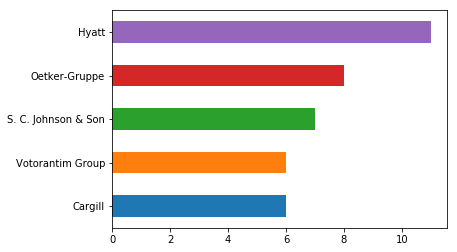

In [12]:
df.company.value_counts().head(5).sort_values().plot(kind='barh')

## 7) How much money do these billionaires have in total?

In [13]:
# Just sum the column
df.networthusbillion.sum()

print("These billioniares have around {} billion dollars in total.".format(round(df.networthusbillion.sum())))

These billioniares have around 6454.0 billion dollars in total.


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [14]:
df.groupby('countrycode').networthusbillion.sum().sort_values(ascending=False).head(10)
                                                            

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [15]:
df.age.mean()
print("The average age of a billionaire is {}.".format(df.age.mean()))

The average age of a billionaire is 63.34213836477988.


In [16]:
df.groupby('selfmade').age.mean()

# You either have to have had lots of time to make money or wait for a parent to die so makes sense I guess

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

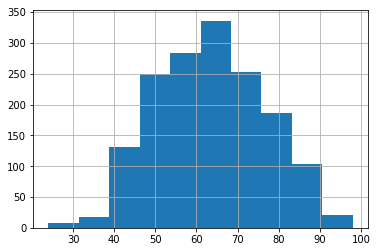

In [17]:
# Here are the youngest billionaire ages
df.age.sort_values(ascending=False).tail()
# Here are the oldest billionaire ages
df.age.sort_values(ascending=False).head()
# Here's the distribution
df.age.sort_values(ascending=False).hist()



## 11) Make a scatterplot of net worth compared to age

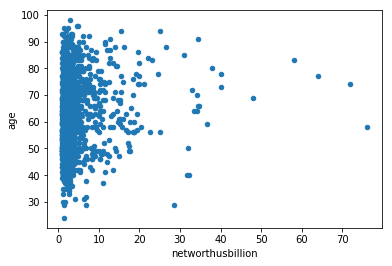

In [18]:
df.plot(x='networthusbillion', y='age', kind='scatter')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

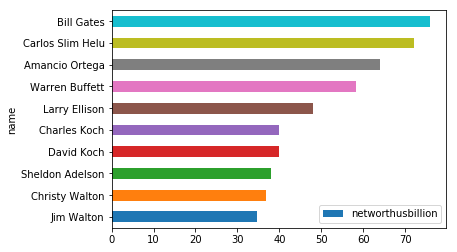

In [50]:
df.sort_values(by='networthusbillion', ascending=False).head(10).sort_values(by='networthusbillion', ascending=True).plot(x='name', y='networthusbillion', kind='barh')

